## Capstone Project: Analyzing HIV Incidence Among Adolescent Girls and Young Women (AGYW)

### Business Understanding
The Dreams dataset is from the Dream Big Program. This project provides critical insights to combat the HIV epidemic among adolescent girls by analyzing five years of program data. Adolescent girls and young women (AGYW) face disproportionately high HIV risk in sub-Saharan Africa, HIV prevalence in young women is over three times higher than in their male peers​ unaids.org. By understanding how HIV incidence has changed from 2018 to 2022 and what factors drive new infections, stakeholders can sharpen their strategies to protect this vulnerable group. The analysis will ensure resources (e.g. prevention programs, funding) are directed to where they have the greatest impact, ultimately moving closer to the goal of an AIDS-free generation of girls.

#### Problem Definition:
Adolescent girls and young women (AGYW) in sub-Saharan Africa are at a significantly higher risk of contracting HIV compared to their male peers. From 2018 to 2022, the Dreams Program aimed to reduce HIV incidence among AGYW. The core problem is that HIV transmission rates remain alarmingly high, and identifying key factors contributing to new infections is critical. By analyzing program data, this project seeks to identify trends and factors that influence HIV risk, helping stakeholders improve intervention strategies.

#### Stakeholders:
- Government agencies (e.g., Ministry of Health): To target interventions more effectively.
- Non-governmental organizations (NGOs): To allocate resources efficiently.
- Public health organizations (e.g., UNAIDS): To measure the effectiveness of existing interventions.
- The DREAM BIG Program itself: To optimize their programming and resources towards high-risk groups.

#### Real-world Problem and Value:
The project’s value lies in its ability to inform the direction of HIV prevention efforts, ensuring they are data-driven and based on a comprehensive understanding of AGYW's risk factors. By identifying which factors (e.g., schooling, parental status, sexual behavior) correlate with HIV risk, this analysis provides actionable insights for public health policies and resource allocation.



### Data Understanding
#### Data Description:
The dataset represents 5 years of program data from the DREAMS Program, focusing on various attributes of AGYW participants, such as demographic details, family structure, health behaviors, and intervention outcomes.

#### Data Source:
The data was provided by the DREAMS Program, a comprehensive initiative targeting HIV prevention among AGYW. The dataset includes a mix of categorical (e.g., county, ever_tested_for_hiv, result) and numerical features (e.g., age_at_first_sexual_encounter, no_of_females), capturing factors influencing HIV risk.

#### Dataset Size and Features:
- Rows: The dataset consists of a large number of records, potentially hundreds or thousands of AGYW participants.
- Categorical Features: Demographic and behavioral variables such as county, head_of_household, ever_tested_for_hiv, etc.
- Numerical Features: Age, household size, intervention types, and program participation.
- Target Variable: result – The final outcome, whether the participant tested HIV-positive (1) or HIV-negative (0).

#### Relevance of Features:
- Socio-demographic factors (e.g., county, head_of_household, ever_tested_for_hiv) are critical in understanding how external circumstances influence HIV risk.
- Behavioral data (e.g., age_at_first_sexual_encounter, ever_had_sex) directly impacts HIV transmission risk.
- Program-specific data (e.g., dreams_program, intervention_name) provides insight into the effectiveness of different intervention strategies.

#### Limitations:
- Missing Data: Some features have missing values (e.g., exit_reason_other).
- Potential Bias: Data may be biased toward those who engaged with the program and those who have data recorded in the system.
- Self-reporting Bias: Behavioral data, especially sexual behavior, could be influenced by self-reporting biases.

### 1. Data Preparation

##### 1.1 Import the Libraries

In [1]:
# Import the libraries
from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import os
import re
import nltk
# nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from wordcloud import WordCloud

##### 1.2 Load the Dataset 

In [2]:
# Read the CSV file as a single column
dreams_df = pd.read_csv("dreams_raw_dataset.csv")
dreams_df.head(5)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


##### 1.3. Initial Dataset Exploration
Display the number of rows and columns in the dataset and list all the column names in the dataset.

In [3]:
# check the shape of the dataset
print(f'The shape of the dataset is {dreams_df.shape}')

print(dreams_df.columns)

print(f'The Target Variable is result')

The shape of the dataset is (455807, 42)
Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 

##### 1.4. Handle missing values
Calculate the percentage of missing values for each column to understand the quality of the dataset.

In [4]:
 # Drop unnecessary columns
columns_to_drop = ['dreams_program', 'dreams_program_other', 'parents_alive_status','head_of_household_other', 'is_one_parent_alive', 'exit_reason_other','no_of_females', 'other_interventions', 'exit_age', 'bio_medical',	'social_protection',	'behavioral',	'post_gbv_care','no_of_males', 'exit_age']
dreams_df = dreams_df.drop(columns=columns_to_drop)

In [5]:
# Define check_missing_data() function
def check_missing_data(dreams_df):
    # Check for missing values by column 
    print("\nProportion of missing values by column:")
    values = 100 * (round(dreams_df.isnull().sum() / len(dreams_df), 2))
    print(values)

    # Impute missing values for remaining columns
    # Impute numerical columns with the mean
    numerical_cols = dreams_df.select_dtypes(include=['float64', 'int64']).columns
    dreams_df[numerical_cols] = dreams_df[numerical_cols].fillna(dreams_df[numerical_cols].mean())
    
    # Impute categorical columns with the mode
    categorical_cols = dreams_df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        dreams_df[col] = dreams_df[col].fillna(dreams_df[col].mode()[0])

    # Check again if there are any missing values left
    print("\nProportion of missing values after imputation:")
    values_after_imputation = 100 * (round(dreams_df.isnull().sum() / len(dreams_df), 2))
    print(values_after_imputation)
    

# Call the check_missing_data() function
check_missing_data(dreams_df)
print(dreams_df.shape)


Proportion of missing values by column:
date_of_birth                         0.0
date_of_enrollment                    0.0
county                                2.0
head_of_household                     2.0
age_of_household_head                 5.0
father_alive                          3.0
mother_alive                          3.0
are_both_parents_alive                0.0
no_of_people_in_household             2.0
no_of_adults                          2.0
no_of_children                        2.0
ever_missed_full_day_food_in_4wks     2.0
no_of_days_missed_food_in_4wks       44.0
currently_in_school                   1.0
current_school_level                 44.0
current_income_source                28.0
ever_tested_for_hiv                   0.0
last_test_result                      0.0
ever_had_sex                          2.0
age_at_first_sexual_encounter        50.0
has_sexual_partner                   50.0
age_of_last_partner                  53.0
used_condom_with_last_partner      

#### 1.5. Duplicates

#### 1.6. Outliers

In [6]:
# Function to remove outliers using IQR with adjusted bounds
def remove_outliers_IQR(dreams_df):
    outlier_indices = []
    
    # Select only numeric columns
    numeric_df = dreams_df.select_dtypes(include=['number'])
    
    # Iterate over each numeric column to find outliers
    for column in numeric_df.columns:
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Adjust the bounds for fewer outliers (less strict for both ends)
        lower_bound = Q1 - 1.25 * IQR  # Modify the lower bound multiplier
        upper_bound = Q3 + 1.25 * IQR  # Modify the upper bound multiplier
        
        # Find the indices of outliers for the column
        outlier_list_col = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)].index
        
        # Add the outlier indices to the list
        outlier_indices.extend(outlier_list_col)
    
    # Ensure that we only have unique indices (no duplicates)
    outlier_indices = list(set(outlier_indices))
    
    # Remove the outliers from the original DataFrame
    dreams_df_cleaned = dreams_df.drop(index=outlier_indices)
    
    # Return the DataFrame with outliers removed
    return dreams_df_cleaned

# Function to drop duplicates
def drop_duplicates(dreams_df, columns=None): 
    if columns is None: 
        dreams_df.drop_duplicates(inplace=True) 
    return dreams_df

# First, remove outliers
cleaned_dreams_df = remove_outliers_IQR(dreams_df)

# Then, drop duplicates from the cleaned DataFrame
cleaned_dreams_df = drop_duplicates(cleaned_dreams_df, columns=None)

# Display the final cleaned DataFrame
cleaned_dreams_df.head(2)

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,no_of_people_in_household,no_of_adults,...,ever_had_sex,age_at_first_sexual_encounter,has_sexual_partner,age_of_last_partner,used_condom_with_last_partner,exit_status,exit_reason,intervention_name,intervention_date,result
0,9/16/2004,2/22/2020,Nairobi,Mother,58.0,Yes,Yes,Yes,6.0,2.0,...,No,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/8/2020,Negative
1,8/2/2004,12/18/2019,Nairobi,Father,43.0,Yes,Yes,Yes,6.0,2.0,...,No,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),4/27/2020,Negative


In [7]:
# Convert 'date_of_birth' column to datetime format
cleaned_dreams_df['date_of_birth'] = pd.to_datetime(cleaned_dreams_df['date_of_birth'])

# Extract the year from the 'date_of_birth' column
cleaned_dreams_df['year_of_birth'] = cleaned_dreams_df['date_of_birth'].dt.year

In [8]:
# Save the cleaned DataFrame to a folder 
folder_path = "../DSF-PT08P5-GROUP5_CAPSTONE-PROJECT/"  
file_name = "cleaned_dreams_df.csv"
full_path = os.path.join(folder_path, file_name)

# Save to CSV
cleaned_dreams_df.to_csv(full_path, index=False)

##### 1.7. Categorical and Numerical Columns
Check the data types of our columns

In [9]:
# Identify categorical columns (dtype = object or category)
categorical_columns = cleaned_dreams_df.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:", categorical_columns)

# Identify categorical columns (dtype = object or category)
numerical_columns = cleaned_dreams_df.select_dtypes(include=['float64', 'int64']).columns

print("numerical columns:", numerical_columns)

Categorical columns: Index(['date_of_enrollment', 'county', 'head_of_household', 'father_alive',
       'mother_alive', 'are_both_parents_alive',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result'],
      dtype='object')
numerical columns: Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter'],
      dtype='object')


In [10]:
cleaned_dreams_df.head(5)

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,no_of_people_in_household,no_of_adults,...,age_at_first_sexual_encounter,has_sexual_partner,age_of_last_partner,used_condom_with_last_partner,exit_status,exit_reason,intervention_name,intervention_date,result,year_of_birth
0,2004-09-16,2/22/2020,Nairobi,Mother,58.0,Yes,Yes,Yes,6.0,2.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/8/2020,Negative,2004
1,2004-08-02,12/18/2019,Nairobi,Father,43.0,Yes,Yes,Yes,6.0,2.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),4/27/2020,Negative,2004
2,2005-10-20,3/7/2020,Nairobi,Mother,41.0,No,Yes,No,5.0,2.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/12/2020,Negative,2005
3,2006-01-18,3/3/2020,Nairobi,Mother,45.0,No,Yes,No,5.0,1.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/12/2020,Negative,2006
4,2004-03-22,12/18/2019,Nairobi,Father,42.0,Yes,Yes,Yes,5.0,3.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),4/27/2020,Negative,2004


##### 1.7. Label encode the Target varibale 'result'

In [11]:
le = LabelEncoder()
cleaned_dreams_df['result'] = le.fit_transform(cleaned_dreams_df['result'])
cleaned_dreams_df.head(5)

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,no_of_people_in_household,no_of_adults,...,age_at_first_sexual_encounter,has_sexual_partner,age_of_last_partner,used_condom_with_last_partner,exit_status,exit_reason,intervention_name,intervention_date,result,year_of_birth
0,2004-09-16,2/22/2020,Nairobi,Mother,58.0,Yes,Yes,Yes,6.0,2.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/8/2020,0,2004
1,2004-08-02,12/18/2019,Nairobi,Father,43.0,Yes,Yes,Yes,6.0,2.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),4/27/2020,0,2004
2,2005-10-20,3/7/2020,Nairobi,Mother,41.0,No,Yes,No,5.0,2.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/12/2020,0,2005
3,2006-01-18,3/3/2020,Nairobi,Mother,45.0,No,Yes,No,5.0,1.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),8/12/2020,0,2006
4,2004-03-22,12/18/2019,Nairobi,Father,42.0,Yes,Yes,Yes,5.0,3.0,...,16.781363,Yes,Older,Sometimes,No,Graduation,HTS - HTS (Client),4/27/2020,0,2004


#### 2. Exploratory Data Analysis
##### 2.1 Visualizing the Distribution of the Target Variable 'result'
The target variable 'result' likely indicates whether a client is hiv positive or negative

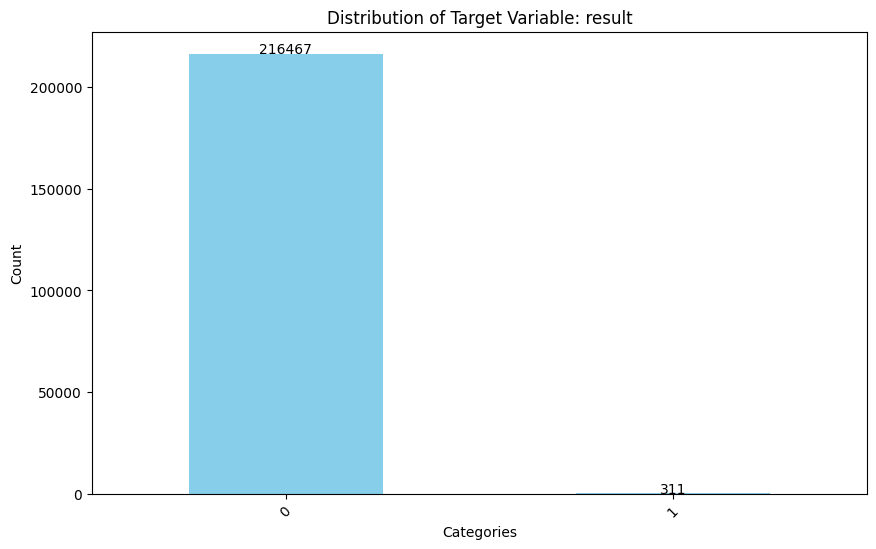

In [13]:
result = cleaned_dreams_df['result']  

# Visualize the distribution of the 'result' column
plt.figure(figsize=(10, 6))
result.value_counts().plot(kind='bar', color='skyblue')  # Use value_counts() to get the count of each category
plt.title('Distribution of Target Variable: result')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values for clarity
for index, value in enumerate(result.value_counts()):
    plt.text(index, value + 2, str(value), ha='center', color='black')  # Adjust +2 for spacing above the bars

plt.show()

#### 2.2. Visualizing the 'result' against other categories

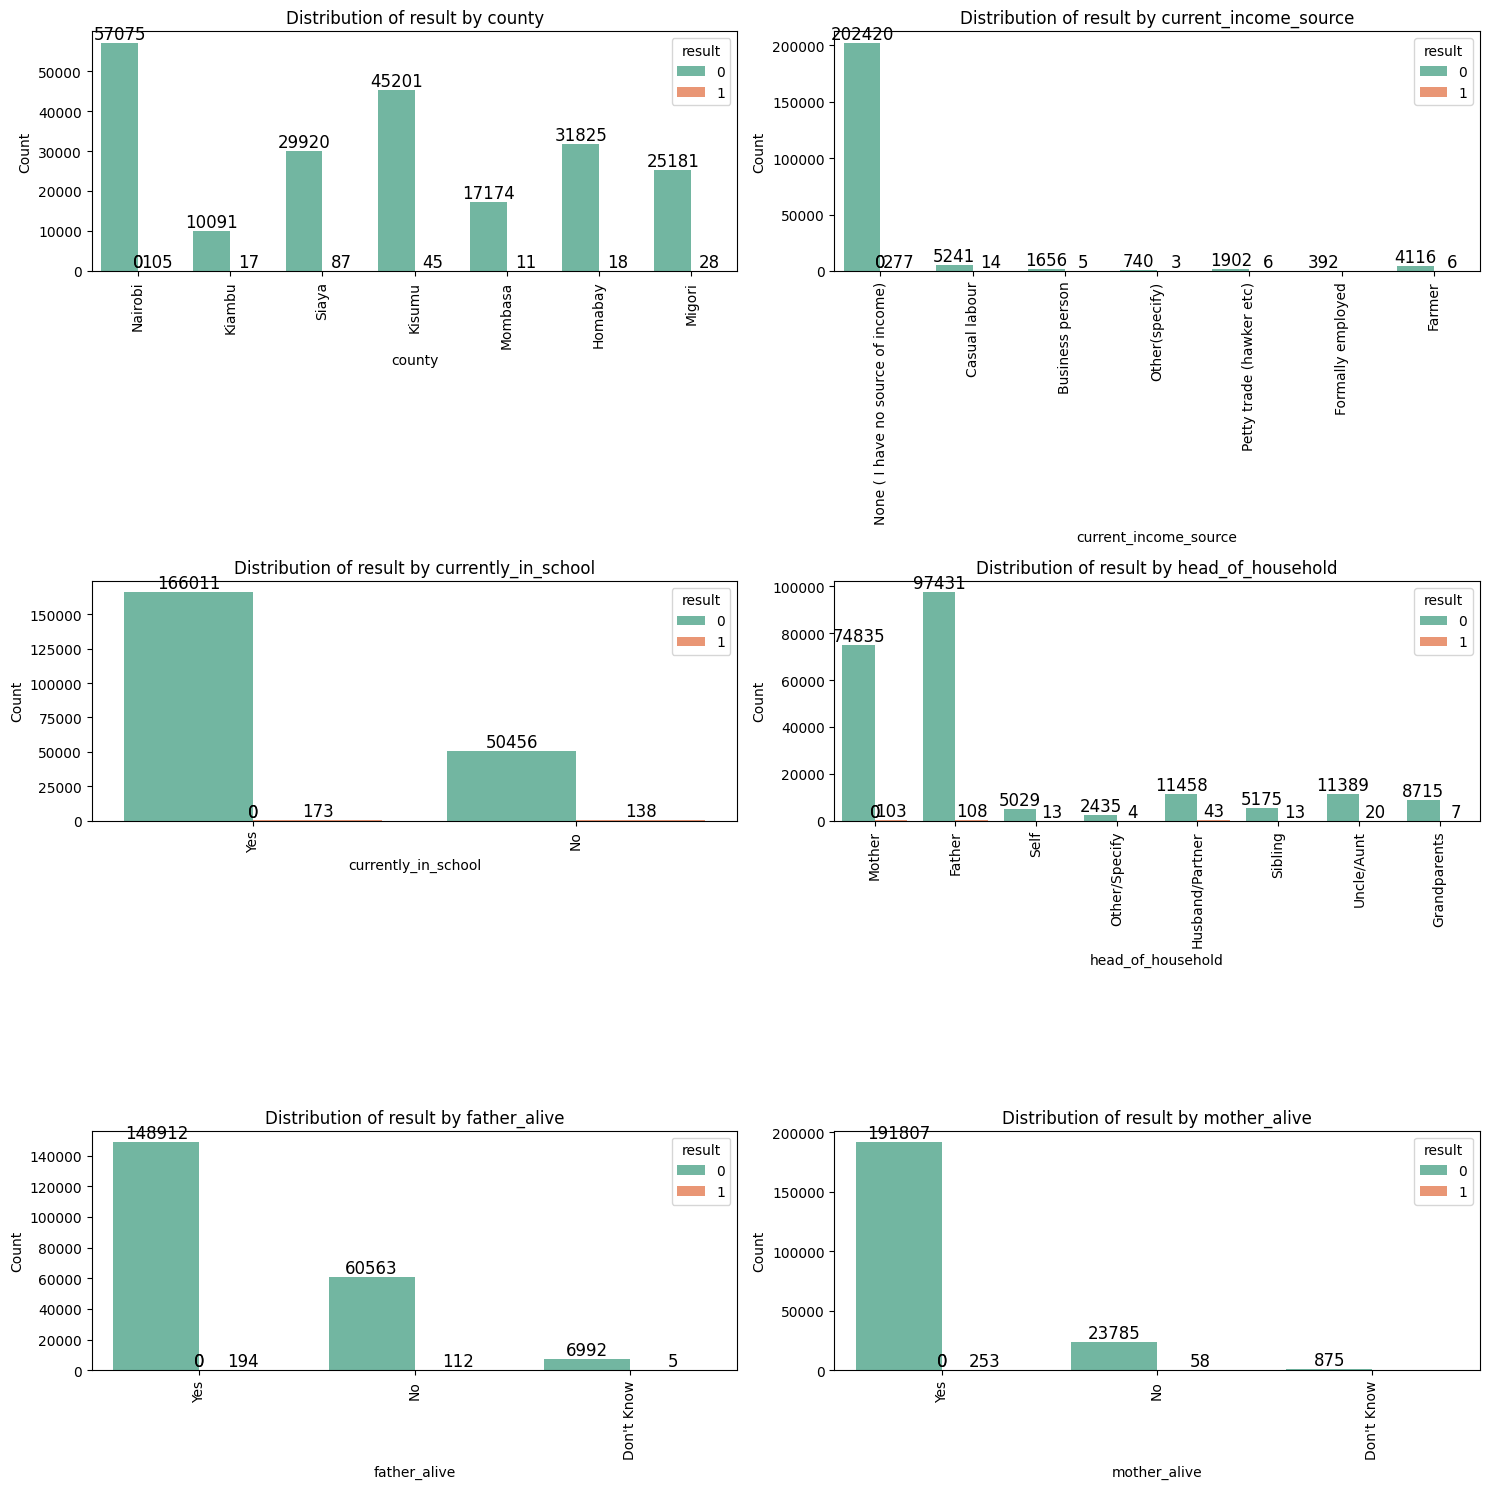

In [14]:

def visualize_result_by_category(cleaned_dreams_df, categorical_columns, target_col='result'):
    """
    Visualizes the distribution of the 'result' column against multiple categorical variables.
    Organizes the plot into a grid with flexible columns.

    Parameters:
    dreams_df (DataFrame): The DataFrame containing the data.
    categorical_columns (list): List of categorical variables to compare 'result' against.
    target_col (str): The column representing the target variable, default is 'result'.

    Returns:
    None: Displays the plot.
    """
    # Strip any leading/trailing spaces in column names
    cleaned_dreams_df.columns = cleaned_dreams_df.columns.str.strip()

    # Check if the target column exists in the DataFrame
    if target_col not in dreams_df.columns:
        print(f"Warning: {target_col} does not exist in the DataFrame.")
        return

    # Check if the categorical columns exist in the DataFrame
    missing_cols = [col for col in categorical_columns if col not in dreams_df.columns]
    if missing_cols:
        print(f"Warning: The following columns are missing from the DataFrame: {', '.join(missing_cols)}")
        categorical_columns = [col for col in categorical_columns if col not in missing_cols]  # Remove missing columns

    # Adjust the number of columns in the plot grid dynamically based on the number of categorical variables
    num_cols = 2  # Set the number of columns in the grid
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

    # Increase figure size for better readability
    plt.figure(figsize=(15, 5 * num_rows))

    # Create a subplot for each categorical variable
    for idx, cat_variable in enumerate(categorical_columns):
        ax = plt.subplot(num_rows, num_cols, idx + 1)

        # Visualize the distribution of 'result' by the categorical variable
        sns.countplot(x=cat_variable, hue=target_col, data=cleaned_dreams_df, palette='Set2', ax=ax)

        # Add the count at the end of each bar
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 2,  # Positioning the text
                    f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black')  # Formatting text

        # Customize each plot
        ax.set_title(f'Distribution of {target_col} by {cat_variable}')
        ax.set_xlabel(cat_variable)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    


# Categorical columns you want to visualize
categorical_columns = [
    'county', 'current_income_source', 'currently_in_school', 'head_of_household',
    'father_alive', 'mother_alive', 'parents_alive_status'
]
visualize_result_by_category(cleaned_dreams_df, categorical_columns)

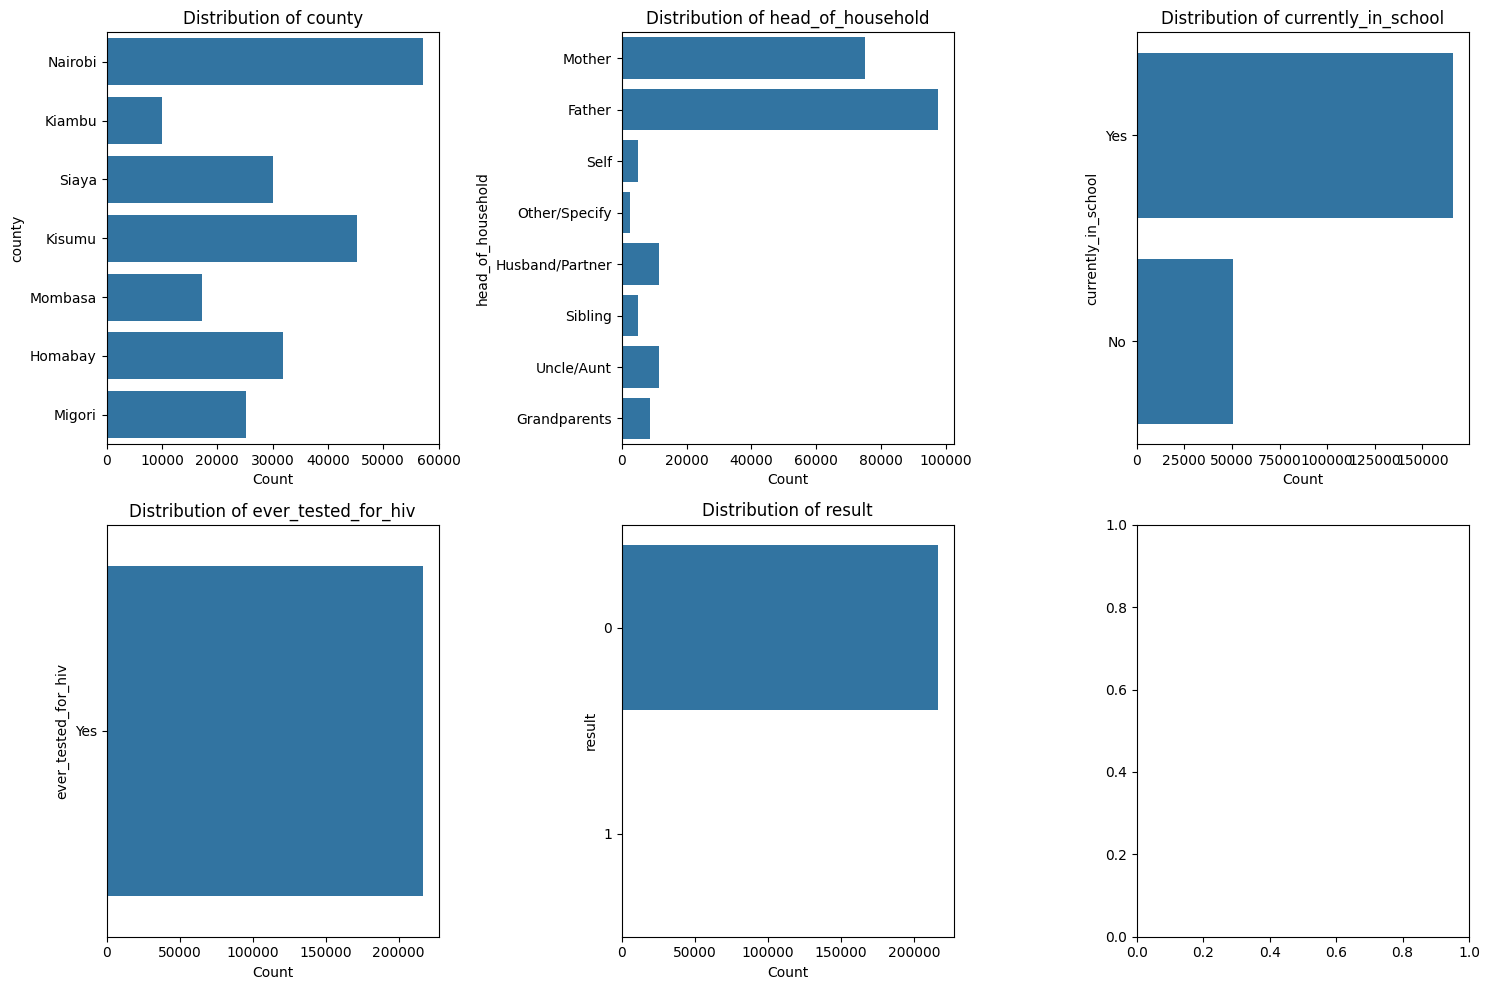

In [15]:
# Visualize categorical columns
def visualize_categorical_distribution(cleaned_dreams_df, cat_columns):
    """
    Visualizes the distribution of each categorical column in the DataFrame, with 3 plots per row.
    """
    n = len(cat_columns)
    num_cols = 3  # Number of columns per row
    num_rows = (n + num_cols - 1) // num_cols  # Calculate number of rows needed
    
    # Set up the figure with the appropriate number of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    for i, col in enumerate(cat_columns):
        sns.countplot(y=col, data=cleaned_dreams_df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()
    
categorical_columns = ['county', 'head_of_household', 'currently_in_school', 'ever_tested_for_hiv', 'result']
visualize_categorical_distribution(cleaned_dreams_df, categorical_columns)

### 3. Modeling

In [16]:
 # Define categorical columns and encode them
 categorical_cols = ['date_of_enrollment', 'county', 'head_of_household', 'father_alive', 'mother_alive',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason', 'intervention_date']
 encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
 X_categorical = encoder.fit_transform(cleaned_dreams_df[categorical_cols])
 X_categorical_df = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_cols))

 # Define numerical columns
 X_numerical = cleaned_dreams_df[['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
                          'no_of_children', 'age_at_first_sexual_encounter', 'post_gbv_care', 'age']]

 # Combine numerical and categorical features
 X_final = pd.concat([X_numerical, X_categorical_df], axis=1)


X = X_final
y = cleaned_dreams_df['result']  # Target variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# Train models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model


KeyError: "['post_gbv_care', 'age'] not in index"

In [ ]:
print(X.shape)  # Check number of rows in X
print(y.shape)  # Check number of rows in y

### 4. Evaluation

In [ ]:
# Evaluate each model
evaluation_results = {}
for name, model in trained_models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test)
    evaluation_results[name] = {
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "AUC-ROC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, 'predict_proba') else "N/A"
    }

# Convert results to DataFrame for better visualization
eval_df = pd.DataFrame(evaluation_results).T.sort_values(by="F1 Score", ascending=False)
print(eval_df)